In [1]:
import librosa , librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [19]:

def plot_sound(file):
    FIG_SIZE = (5,5)

    

    # load audio file with Librosa
    signal, sample_rate = librosa.load(file, sr=22050)

    # WAVEFORM
    # display waveform
    plt.figure(figsize=FIG_SIZE)
    librosa.display.waveplot(signal, sample_rate, alpha=0.4)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Waveform")


    # FFT -> power spectrum
    # perform Fourier transform
    fft = np.fft.fft(signal)

    # calculate abs values on complex numbers to get magnitude
    spectrum = np.abs(fft)

    # create frequency variable
    f = np.linspace(0, sample_rate, len(spectrum))

    # take half of the spectrum and frequency
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]

    # plot spectrum
    plt.figure(figsize=FIG_SIZE)
    plt.plot(f, spectrum, alpha=0.4)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("full power spectrum")


    # plot spectrum
    plt.figure(figsize=FIG_SIZE)
    plt.plot(left_f, left_spectrum, alpha=0.4)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("Power spectrum")


    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft)

    # display spectrogram
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.title("Spectrogram")

    # apply logarithm to cast amplitude to Decibels
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram (dB)")


    # MFCCs
    # extract 13 MFCCs
    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    # display MFCCs
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")

    # show plots
    plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


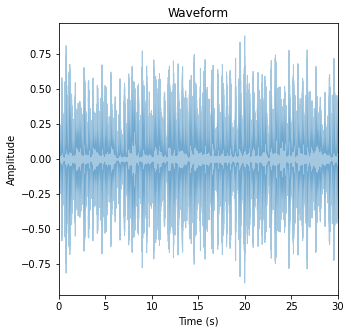

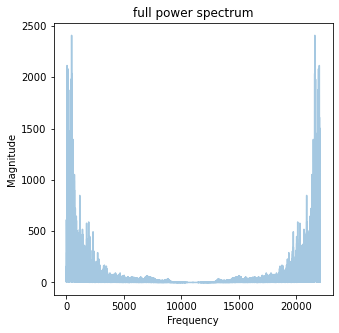

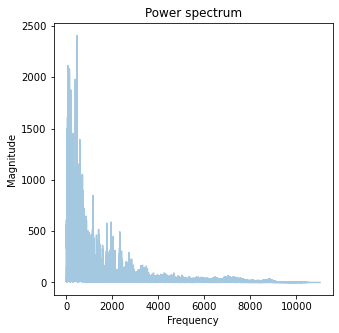

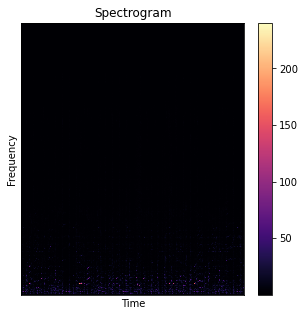

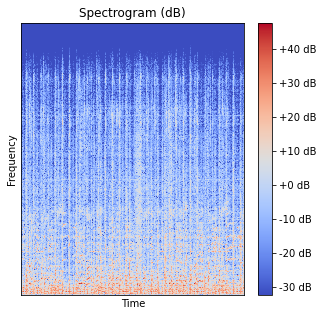

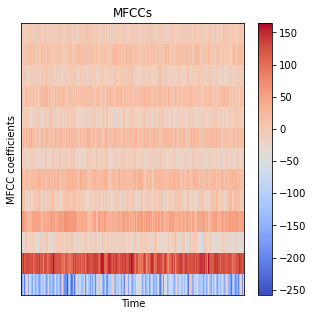

In [20]:
file = "wav files/blues.wav"

plot_sound(file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


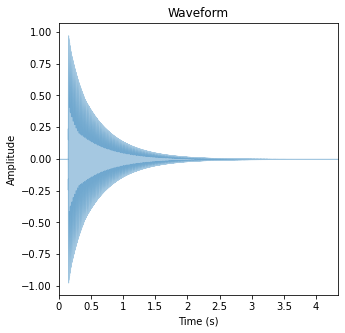

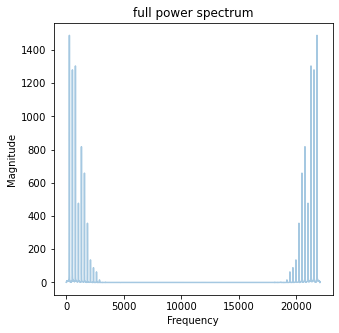

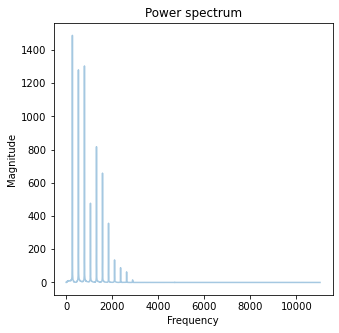

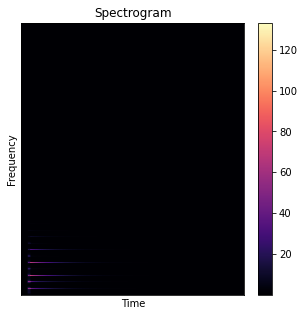

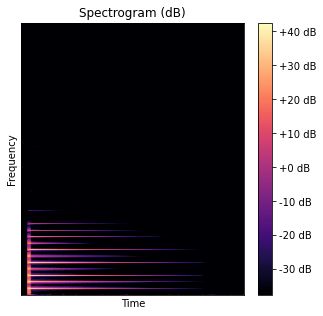

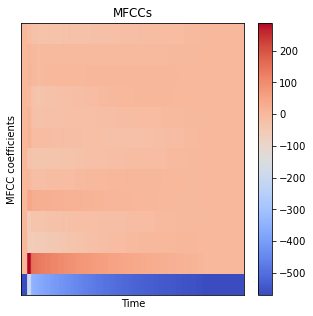

In [22]:
file ="wav files/c4.wav"
plot_sound(file)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


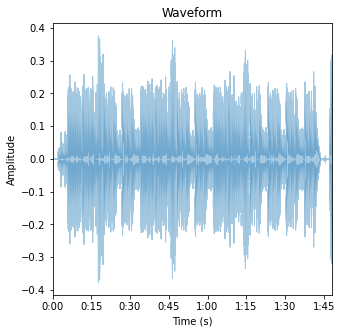

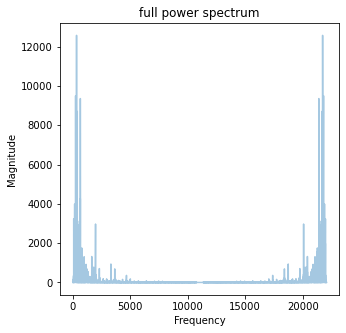

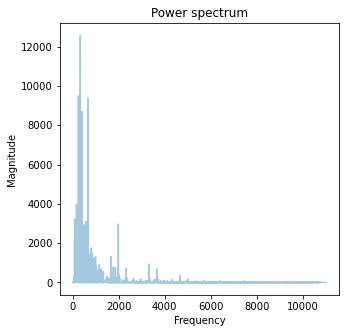

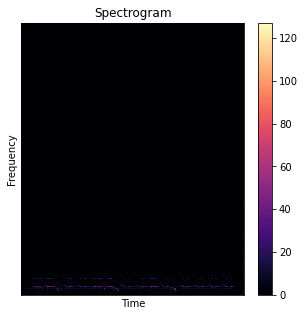

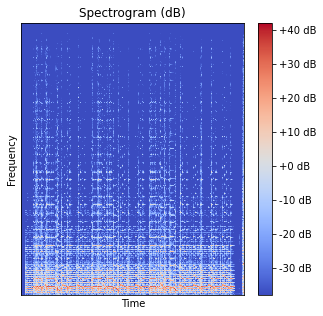

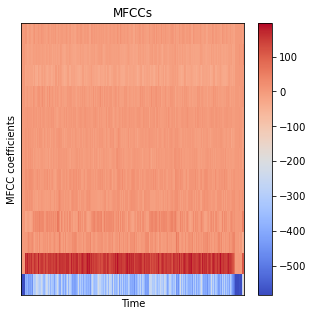

In [24]:
file = "wav files/wewillrocku.wav"
plot_sound(file)

In [25]:
signal, sample_rate = librosa.load(file, sr=22050)


In [31]:
fft = np.fft.fft(signal)


In [28]:
sample_rate

22050

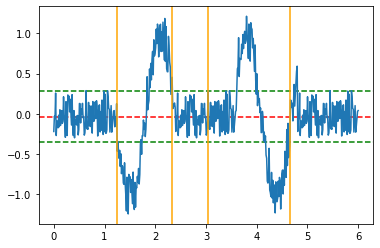

In [33]:


# create noise data
def function(x, noise):
    y = np.sin(7*x+2) + noise
    return y

def function2(x, noise):
    y = np.sin(6*x+2) + noise
    return y


noise = np.random.uniform(low=-0.3, high=0.3, size=(100,))
x_line0 = np.linspace(1.95,2.85,100)
y_line0 = function(x_line0, noise)
x_line = np.linspace(0, 1.95, 100)
x_line2 = np.linspace(2.85, 3.95, 100)
x_pik = np.linspace(3.95, 5, 100)
y_pik = function2(x_pik, noise)
x_line3 = np.linspace(5, 6, 100)

# concatenate noise data
x = np.linspace(0, 6, 500)
y = np.concatenate((noise, y_line0, noise, y_pik, noise), axis=0)

# plot data
noise_band = 1.1
top_noise = y.mean()+noise_band*np.amax(noise)
bottom_noise = y.mean()-noise_band*np.amax(noise)
fig, ax = plt.subplots()
ax.axhline(y=y.mean(), color='red', linestyle='--')
ax.axhline(y=top_noise, linestyle='--', color='green')
ax.axhline(y=bottom_noise, linestyle='--', color='green')
ax.plot(x, y)

# split data into 2 signals
def split(arr, cond):
  return [arr[cond], arr[~cond]]

# find bottom noise data indexes
botom_data_indexes = np.argwhere(y < bottom_noise)
# split by visual x value
splitted_bottom_data = split(botom_data_indexes, botom_data_indexes < np.argmax(x > 3))

# find top noise data indexes
top_data_indexes = np.argwhere(y > top_noise)
# split by visual x value
splitted_top_data = split(top_data_indexes, top_data_indexes < np.argmax(x > 3))

# get first signal range
first_signal_start = np.amin(splitted_bottom_data[0])
first_signal_end = np.amax(splitted_top_data[0])

# get x index of first signal
x_first_signal = np.take(x, [first_signal_start, first_signal_end])
ax.axvline(x=x_first_signal[0], color='orange')
ax.axvline(x=x_first_signal[1], color='orange')

# get second signal range
second_signal_start = np.amin(splitted_top_data[1])
second_signal_end = np.amax(splitted_bottom_data[1])

# get x index of first signal
x_second_signal = np.take(x, [second_signal_start, second_signal_end])
ax.axvline(x=x_second_signal[0], color='orange')
ax.axvline(x=x_second_signal[1], color='orange')

plt.show()